## Notebook demonstrating weather forecast data access using the Pylaski api and Thredds server

This notebook demonstrates how to access weather forecast data.  The <a href = "https://doi.org/10.1016/j.procs.2017.05.174">pylaski api</a> provides access to a variety of data from cameras, weather stations, and weather forecast models in California.  The thredds server is an additional way to access forecast data provided by SDG&E. 

There are multiple weather forecast models ("sources") and each has its own set of variables and timesteps.

This notebook references multiple weather <a href = "https://wxmap.sdsc.edu/">forecast models</a> such as: 

- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-gfs-001-wrf">SDGE GFS 001 (6 km)</a>   
- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-gfs-002-wrf">SDGE GFS 002 (2 km)</a>    
- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-gfs-003-wrf">SDGE GFS 003 (2 km)</a>  
- <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-nam-001-wrf">SDGE NAM 001 (2 km)</a>
- <a href = "https://wifire-data.sdsc.edu/dataset/sdg-e-operational-ensemble-nam-002-wrf">SDGE NAM 002 (2 km)</a>
- <a href = "https://www.ncei.noaa.gov/products/weather-climate-models/global-forecast">NWS GFS 0.25 Degree</a>
- <a href = "https://wifire-data.sdsc.edu/dataset/high-resolution-rapid-refresh-hrrr">NWS HRRR (3 km)</a>
- <a href = "https://wifire-data.sdsc.edu/dataset/national-digital-forecast-database-ndfd">NWS NDFD (2.5 km)</a>




<h3>Notebook Overview:</h3>
<ol><a href='#metadata'><li>All forecast models and associated variables available through Pylaski</li></a>
    <a href='#1model_1var'><li>Timeseries forecast at a specific lat/lon for 1 model and 1 variable</li></a>
    <a href='#2var_2_models'><li>Timeseries forecast at a specific lat/lon for 2 models and 2 variables</li></a>
    <a href='#thredds'><li>Accessing SDGE forecast data using thredds server</li></a>
        


In [1]:
import requests, json, pprint
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

plt.style.use('ggplot')

<a id='metadata'><h3>forecast metadata shows all forecast models and associated variables available through Pylaski</h3></a>

In [2]:
url = 'https://sdge.sdsc.edu/pylaski/forecast/metadata?source=all'
r = requests.get(url)   
metadata = r.json()     
df=pd.DataFrame(metadata) 
df

,ndfd,gfs25,hrrr,sdge_ens_gfs_001_wrf,sdge_ens_gfs_001_dfmnfdrs,sdge_ens_gfs_002_wrf,sdge_ens_gfs_003_wrf,sdge_ens_nam_001_wrf,sdge_ens_nam_001_dfmnfdrs,sdge_ens_nam_002_wrf
timesteps,"[2021121218, 2021121102, 2021121205, 202112121...","[2021121018, 2021121019, 2021121020, 202112102...","[202112110200, 202112110415, 202112101900, 202...","[2021121413, 2021121811, 2021121218, 202112131...","[2021121413, 2021121218, 2021121313, 202112170...","[2021121008, 2021121302, 2021121218, 202112131...","[2021121008, 2021121302, 2021121218, 202112131...","[2021121218, 2021121302, 2021121313, 202112130...","[2021121218, 2021121302, 2021121308, 202112110...","[2021121218, 2021121302, 2021121313, 202112130..."
variables,"[10m_wind_direction, air_temperature_2m, 10m_w...","[air_temperature_2m, 10m_wind_direction, 10m_w...","[air_temperature_2m, 10m_wind_direction, 10m_w...","[hourly_precipitation_amount, accumulated_snow...","[ignition_component, mean_wtd_moisture_1hr, bu...","[hourly_precipitation_amount, accumulated_snow...","[hourly_precipitation_amount, accumulated_snow...","[hourly_precipitation_amount, accumulated_snow...","[ignition_component, mean_wtd_moisture_1hr, bu...","[hourly_precipitation_amount, accumulated_snow..."


<a id='1model_1var'><h3>example 1) timeseries forecast at a specific lat/lon for 1 model and variable</h3></a>

Let's consider
- location (lat=32.61392993783565 & lon=-116.60064697265625)
- model (source=sdge_ens_nam_001_wrf)
- variable (obs=air_temperature_925mb)   --note, this is air temperature at 925 millibar pressure surface

In [3]:
# enter lat/lon, source (model), and obs (variable) into the url string

lat = 32.61392993783565
lon = -116.60064697265625
variable='air_temperature_925mb'
model='sdge_ens_nam_001_wrf'

selectionParameters = "&lat=%s&lon=%s&&source=%s&obs=%s" % (str(lat),str(lon),model,variable)

baseURL='https://sdge.sdsc.edu/pylaski/forecast?'

url = baseURL + selectionParameters

#url = 'https://sdge.sdsc.edu/pylaski/forecast?lat=32.61392993783565&lon=-116.60064697265625&source=sdge_ens_nam_001_wrf&obs=air_temperature_925mb'
url

'https://sdge.sdsc.edu/pylaski/forecast?&lat=32.61392993783565&lon=-116.60064697265625&&source=sdge_ens_nam_001_wrf&obs=air_temperature_925mb'

In [4]:
r = requests.get(url)  # Request to GET information from the given URL 
r_json = r.json()      # Extract JSON object from data returned on GET request

pprint.pprint(r_json['features'][0])     

{'geometry': {'coordinates': [-116.60064697265625, 32.61392993783565],
              'type': 'Point'},
 'properties': {'air_temperature_925mb': [6.0,
                                          7.0,
                                          7.0,
                                          8.0,
                                          8.0,
                                          9.0,
                                          9.0,
                                          10.0,
                                          10.0,
                                          9.0,
                                          9.0,
                                          9.0,
                                          9.0,
                                          9.0,
                                          9.0,
                                          9.0,
                                          9.0,
                                          9.0,
                                          10.0,
 

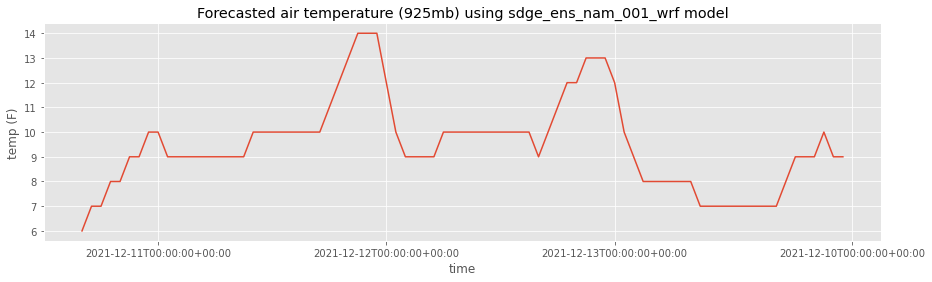

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15,4))

time = r_json['features'][0]['properties']['timestamp']
temp = r_json['features'][0]['properties']['air_temperature_925mb']

ax.plot(time,temp)
ax.set_xlabel('time')
ax.set_ylabel('temp (F)')
ax.set_title('Forecasted air temperature (925mb) using sdge_ens_nam_001_wrf model')
ax.set_xticks(['2021-12-10T00:00:00+00:00','2021-12-11T00:00:00+00:00','2021-12-12T00:00:00+00:00','2021-12-13T00:00:00+00:00']);

<a id='2var_2_models'><h3>example 2) timeseries for 2 variables from 2 models</h3></a>

In [6]:
# enter lat/lon, source (model), and obs (variable) into the url string

baseURL='https://sdge.sdsc.edu/pylaski/forecast?'

lat = 33.708347493688414
lon = -116.58691406250001
variables = 'air_temperature_2m,relative_humidity_2m'
models = 'sdge_ens_gfs_002_wrf,ndfd'

selectionParameters = "&lat=%s&lon=%s&&source=%s&obs=%s" % (str(lat),str(lon),models,variables)

url = baseURL + selectionParameters

#url = 'https://sdge.sdsc.edu/pylaski/forecast?lat=33.708347493688414&lon=-116.58691406250001&source=sdge_ens_gfs_002_wrf,ndfd&obs=air_temperature_2m,relative_humidity_2m'
url

'https://sdge.sdsc.edu/pylaski/forecast?&lat=33.708347493688414&lon=-116.58691406250001&&source=sdge_ens_gfs_002_wrf,ndfd&obs=air_temperature_2m,relative_humidity_2m'

In [7]:
r = requests.get(url)  # Request to GET information from the given URL 
r_json = r.json()      # Extract JSON object from data returned on GET request

pprint.pprint(r_json['features'])     

[{'geometry': {'coordinates': [-116.58691406250001, 33.708347493688414],
               'type': 'Point'},
  'properties': {'air_temperature_2m': [39.0,
                                        39.0,
                                        39.0,
                                        39.0,
                                        41.0,
                                        38.0,
                                        41.0,
                                        41.0,
                                        38.0,
                                        37.0,
                                        41.0,
                                        37.0,
                                        42.0,
                                        43.0,
                                        44.0,
                                        45.0,
                                        46.0,
                                        47.0,
                                        47.0,
                    

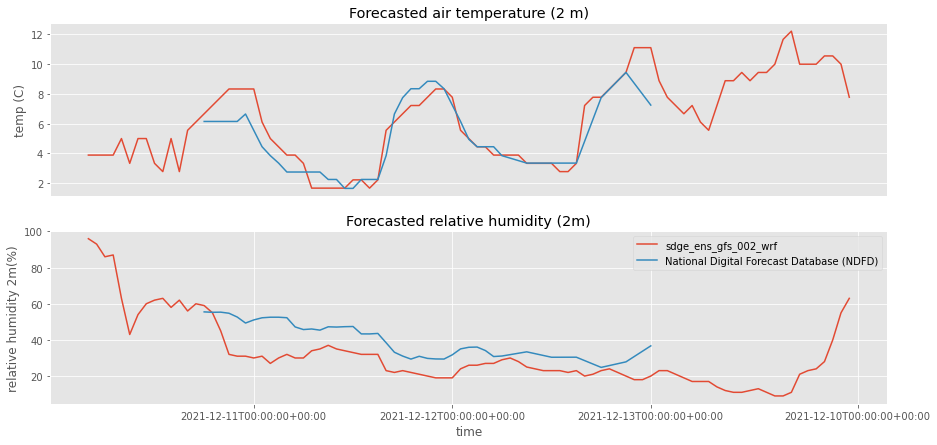

In [8]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(15,7))

# sdge_ens_gfs_002_wrf
time_sdge = r_json['features'][0]['properties']['timestamp']
temp_sdge = r_json['features'][0]['properties']['air_temperature_2m']
temp_sdge_celsius = [(x - 32)*(5/9) for x in temp_sdge]  #convert to celsius from F
rel_humidity_sdge = r_json['features'][0]['properties']['relative_humidity_2m']

# NOAA NWS National Digital Forecast Database (NDFD)
time_ndfd = r_json['features'][1]['properties']['timestamp']
temp_ndfd = r_json['features'][1]['properties']['air_temperature_2m']
rel_humidity_ndfd = r_json['features'][1]['properties']['relative_humidity_2m']

ax[0].plot(time_sdge,temp_sdge_celsius, label='sdge_ens_gfs_002_wrf')
ax[0].plot(time_ndfd,temp_ndfd, label='National Digital Forecast Database (NDFD)')
#ax[0].set_xlabel('time')
ax[0].set_ylabel('temp (C)')
#ax[0].legend()
ax[0].set_title('Forecasted air temperature (2 m)')
#ax[0].set_xticks(['2021-12-10T00:00:00+00:00','2021-12-11T00:00:00+00:00','2021-12-12T00:00:00+00:00','2021-12-13T00:00:00+00:00'])
ax[0].set_xticks([])
#ax[0].set_xlabel([])


ax[1].plot(time_sdge,rel_humidity_sdge, label='sdge_ens_gfs_002_wrf')
ax[1].plot(time_ndfd,rel_humidity_ndfd, label='National Digital Forecast Database (NDFD)')
ax[1].set_xlabel('time')
ax[1].set_ylabel('relative humidity 2m(%)')
ax[1].legend()
ax[1].set_title('Forecasted relative humidity (2m)')
ax[1].set_xticks(['2021-12-10T00:00:00+00:00','2021-12-11T00:00:00+00:00','2021-12-12T00:00:00+00:00','2021-12-13T00:00:00+00:00']);



<a id='thredds'><h3>example 3) accessing SDGE forecast data using thredds server</h3></a>

SDGE forecast data can be accessed using the thredds server. All of the available SDGE data available through the thredds server can be viewed <a href = "https://sdge.sdsc.edu/thredds/catalog.html">here.</a>

For example, we can <a href = "https://wxmap.sdsc.edu/?model=sdge_ens_nam_001_wrf">visualize</a> and access data from the <a href = "https://wifire-data.sdsc.edu/dataset/sdge-op-ensemble-nam-001-wrf">ens-nam-001 model</a> here: https://sdge.sdsc.edu/thredds/catalog/sdge/op/ens-nam-001/wrf/2021-12/catalog.html

#### Let's choose a dataset and take a closer look

In [9]:
url ='https://sdge.sdsc.edu/thredds/dodsC/sdge/op/ens-nam-001/wrf/2021-12/wrfout_d02_202112091600Z.nc'

ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:                              (time: 81, y: 209, x: 326)
Coordinates:
  * time                                 (time) datetime64[ns] 2021-12-09T16:...
    latitude                             (y, x) float32 ...
    longitude                            (y, x) float32 ...
Dimensions without coordinates: y, x
Data variables: (12/55)
    eastward_10m_wind                    (time, y, x) float32 ...
    northward_10m_wind                   (time, y, x) float32 ...
    eastward_50m_wind                    (time, y, x) float32 ...
    northward_50m_wind                   (time, y, x) float32 ...
    eastward_925mb_wind                  (time, y, x) float32 ...
    northward_925mb_wind                 (time, y, x) float32 ...
    ...                                   ...
    air_temperature_2m_max               (time, y, x) float32 ...
    air_temperature_2m_min               (time, y, x) float32 ...
    surface_divergence                   (time, y, x) float32 ...
    tstorm_potential                     (time, y, x) float32 ...
    crs                                  int32 ...
    latitude_longitude                   |S64 ...
Attributes: (12/19)
    Conventions:                     CF-1.6
    ens_id:                          ens_001
    bc_name:                         nam
    inittime:                        2021-12-09T12:00:00.000Z
    TITLE:                            OUTPUT FROM WRF V3.9.1.1 MODEL
    START_DATE:                      2021-12-09_12:00:00
    ...                              ...
    STAND_LON:                       -118.673
    MAP_PROJ:                        1
    history:                         Thu Dec  9 09:07:11 2021: /usr/bin/ncrca...
    NCO:                             netCDF Operators version 4.9.1 (Homepage...
    DODS.strlen:                     0
    DODS_EXTRA.Unlimited_Dimension:  time

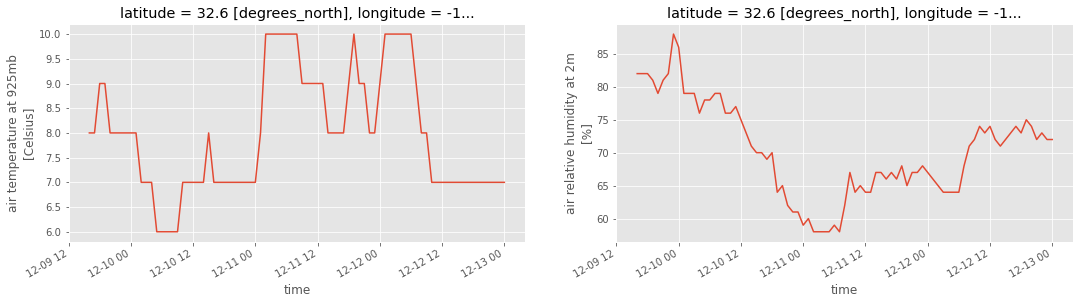

In [10]:
# We can plot air temperature (925 millibar) and relative humidity (2 m)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18,4))
ds.air_temperature_925mb.isel(y=59,x=150).plot(ax=axes[0])  # .isel returns new dataset with each array indexed along specified dimensions
ds.relative_humidity_2m.isel(y=59,x=150).plot(ax=axes[1])


**references:**
 
- Forecast visualization map: https://wxmap.sdsc.edu/
- pylaski api reference: https://doi.org/10.1016/j.procs.2017.05.174
- SDGE models: https://wifire-data.sdsc.edu/organization/sdge
- NWS GFS: https://www.ncei.noaa.gov/products/weather-climate-models/global-forecast
- NWS HRRR: https://wifire-data.sdsc.edu/dataset/high-resolution-rapid-refresh-hrrr
- NWS NDFD: https://wifire-data.sdsc.edu/dataset/national-digital-forecast-database-ndfd